In [1]:
# Library for dataset upload
import pandas as pd

In [2]:
# for getting accss of gdrive file
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#import your dataframe
df = pd.read_csv('/content/price.csv')

In [4]:
#set date as index for graph
df["Date"] = pd.to_datetime(df["Date"], infer_datetime_format = True)

In [5]:
#library for graph
import matplotlib as mpl 
import matplotlib.pyplot as plt 

array([<Axes: xlabel='Date'>], dtype=object)

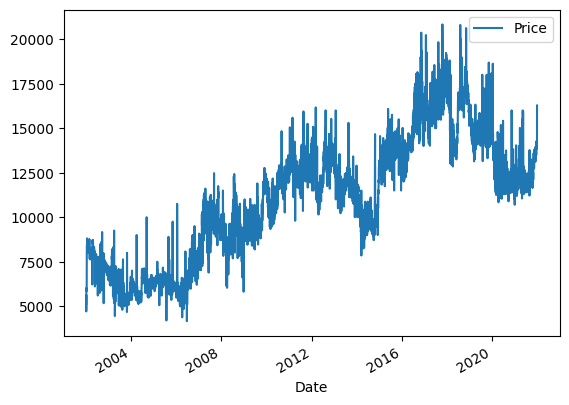

In [6]:
df.set_index('Date')[['Price']].plot(subplots = True)

In [7]:
df1= df['Price']

In [8]:
import numpy as np
df1

0        5124.0
1        5628.3
2        4710.0
3        4940.0
4        6021.7
         ...   
6758    14037.8
6759    14050.3
6760    14033.8
6761    14025.2
6762    16275.0
Name: Price, Length: 6763, dtype: float64

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [10]:
print(df1)

[[0.0576645 ]
 [0.08792171]
 [0.03282515]
 ...
 [0.5922386 ]
 [0.59172262]
 [0.72670711]]


In [11]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.85)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [12]:
training_size,test_size

(5748, 1015)

In [13]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [14]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 30
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [15]:
print(X_train.shape), print(y_train.shape)

(5717, 30)
(5717,)


(None, None)

In [16]:
print(X_test.shape), print(ytest.shape)

(984, 30)
(984,)


(None, None)

In [17]:
# reshape input to be [samples, time steps, features] which is required for Stacked LSTM model
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [18]:
# # Create the Stacked LSTM model
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense
# from tensorflow.keras.layers import LSTM

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense

model = Sequential()
model.add(GRU(5, input_shape=(30, 1)))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='mean_squared_error', optimizer='adam')


In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 5)                 120       
                                                                 
 dense (Dense)               (None, 1)                 6         
                                                                 
Total params: 126
Trainable params: 126
Non-trainable params: 0
_________________________________________________________________


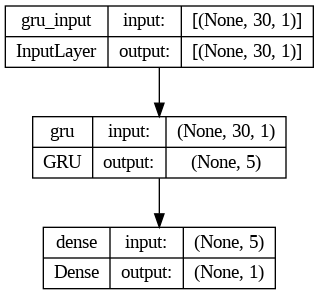

In [20]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [21]:
history = model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=20,batch_size=64,verbose=1)

Epoch 1/20
90/90 [==============================] - 5s 22ms/step - loss: 0.0424 - val_loss: 0.0097
Epoch 2/20
90/90 [==============================] - 2s 17ms/step - loss: 0.0139 - val_loss: 0.0021
Epoch 3/20
90/90 [==============================] - 2s 17ms/step - loss: 0.0022 - val_loss: 0.0021
Epoch 4/20
90/90 [==============================] - 1s 16ms/step - loss: 0.0021 - val_loss: 0.0019
Epoch 5/20
90/90 [==============================] - 2s 22ms/step - loss: 0.0020 - val_loss: 0.0021
Epoch 6/20
90/90 [==============================] - 2s 25ms/step - loss: 0.0019 - val_loss: 0.0023
Epoch 7/20
90/90 [==============================] - 3s 29ms/step - loss: 0.0018 - val_loss: 0.0022
Epoch 8/20
90/90 [==============================] - 2s 22ms/step - loss: 0.0018 - val_loss: 0.0021
Epoch 9/20
90/90 [==============================] - 2s 17ms/step - loss: 0.0017 - val_loss: 0.0018
Epoch 10/20
90/90 [==============================] - 1s 16ms/step - loss: 0.0017 - val_loss: 0.0019
Epoch 11/

In [22]:
pd.DataFrame(history.history)

,loss,val_loss
0,0.042418,0.009673
1,0.013932,0.002121
2,0.002179,0.002092
3,0.002084,0.001945
4,0.002003,0.002065
5,0.001921,0.002298
6,0.001849,0.002184
7,0.001796,0.002052
8,0.001721,0.001787
9,0.001664,0.001890


<Axes: >

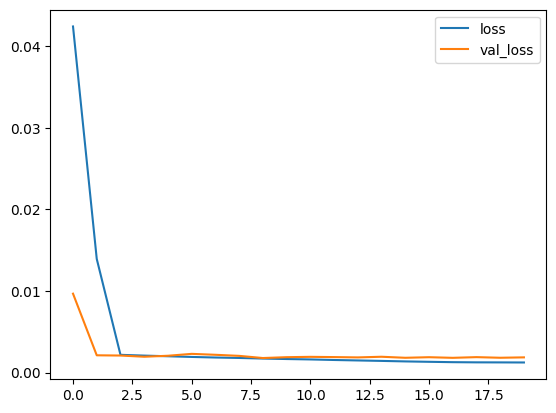

In [23]:
pd.DataFrame(history.history)[['loss', 'val_loss']].plot()

In [24]:
import tensorflow as tf

In [25]:
# prediction and check performance
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

31/31 [==============================] - 0s 6ms/step


In [26]:
# reverseTransformation
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [27]:
# RMSE of train test
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

11500.199893291954

In [28]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

13395.0799041067

In [30]:
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Define the actual and predicted values
y_true = y_train.tolist()
y_pred = train_predict.tolist()

# Calculate R-squared (r2score)
r2score = r2_score(y_true, y_pred)
print("R-squared (r2score):", r2score)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
print("Root Mean Squared Error (RMSE):", rmse)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_true, y_pred)
print("Mean Absolute Error (MAE):", mae)

# Calculate Mean Absolute Percentage Error (MAPE)
# mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
# print("Mean Absolute Percentage Error (MAPE):", mape)

R-squared (r2score): -3020810731.2763968
Root Mean Squared Error (RMSE): 11500.199893291954
Mean Absolute Error (MAE): 10972.475388603627


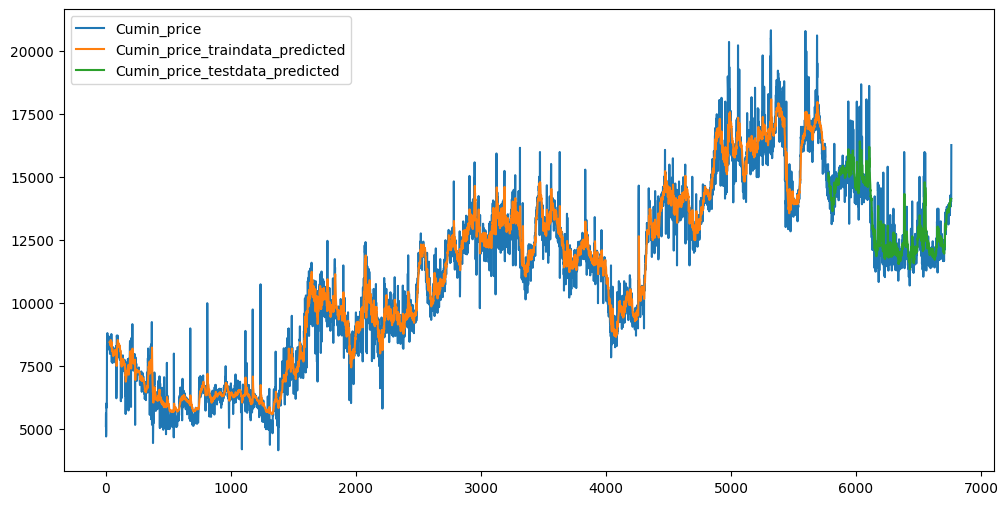

In [31]:
### Plotting 
# shift train predictions for plotting
look_back=30
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.figure(figsize=(12, 6))
plt.plot(scaler.inverse_transform(df1), label = 'Cumin_price')
plt.plot(trainPredictPlot, label = 'Cumin_price_traindata_predicted')
plt.plot(testPredictPlot, label = 'Cumin_price_testdata_predicted')
plt.legend()
plt.show()

In [32]:
#printing the testing predicted data
test_predict

array([[15157.153 ],
       [15051.542 ],
       [14881.415 ],
       [14821.622 ],
       [14877.334 ],
       [15042.787 ],
       [14938.8125],
       [14793.93  ],
       [14728.249 ],
       [14622.89  ],
       [14639.233 ],
       [14643.047 ],
       [14565.464 ],
       [14489.224 ],
       [14359.384 ],
       [14392.432 ],
       [14638.952 ],
       [14558.766 ],
       [14624.874 ],
       [14464.747 ],
       [14332.907 ],
       [14247.34  ],
       [14263.4795],
       [14195.036 ],
       [14186.52  ],
       [14079.302 ],
       [14158.135 ],
       [14054.945 ],
       [13855.038 ],
       [13775.667 ],
       [13741.763 ],
       [13784.847 ],
       [13682.852 ],
       [13735.813 ],
       [13648.535 ],
       [14140.699 ],
       [13908.278 ],
       [13948.433 ],
       [13947.331 ],
       [13892.401 ],
       [14174.413 ],
       [14168.451 ],
       [14069.986 ],
       [13949.62  ],
       [13939.239 ],
       [13978.173 ],
       [13985.421 ],
       [14141

In [33]:
len(test_data)

1015

In [34]:
x_input=test_data[985:].reshape(1,-1)
x_input.shape

(1, 30)

In [35]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
temp_input

[0.566439272578913,
 0.571155149966101,
 0.5707891594818535,
 0.5631333585326782,
 0.5692052006647828,
 0.5652753028421261,
 0.5377120194874934,
 0.5844448044350847,
 0.582314859813645,
 0.5860167635641474,
 0.5815348800931176,
 0.5884107013217657,
 0.559029465233904,
 0.5810968914808216,
 0.5859087663720743,
 0.5750850477887576,
 0.5744790635443479,
 0.5694691938009612,
 0.560001439962561,
 0.5903486509350757,
 0.5886206958619077,
 0.6068482219462294,
 0.5942785487577323,
 0.5912726269117005,
 0.5805269063004362,
 0.5924785955565156,
 0.5932285760570225,
 0.5922386017963533,
 0.5917226152120046,
 0.7267071056152541]

In [36]:
# demonstrate prediction for next 30 days
from numpy import array

lstm_output=[]
n_steps=30
i=0
while(i<365):
    
    if(len(temp_input)>30):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lstm_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lstm_output.extend(yhat.tolist())
        i=i+1
print(lstm_output)   

[0.637988]
31
1 day input [0.57115515 0.57078916 0.56313336 0.5692052  0.5652753  0.53771202
 0.5844448  0.58231486 0.58601676 0.58153488 0.5884107  0.55902947
 0.58109689 0.58590877 0.57508505 0.57447906 0.56946919 0.56000144
 0.59034865 0.5886207  0.60684822 0.59427855 0.59127263 0.58052691
 0.5924786  0.59322858 0.5922386  0.59172262 0.72670711 0.63798797]
1 day output [[0.6344197]]
2 day input [0.57078916 0.56313336 0.5692052  0.5652753  0.53771202 0.5844448
 0.58231486 0.58601676 0.58153488 0.5884107  0.55902947 0.58109689
 0.58590877 0.57508505 0.57447906 0.56946919 0.56000144 0.59034865
 0.5886207  0.60684822 0.59427855 0.59127263 0.58052691 0.5924786
 0.59322858 0.5922386  0.59172262 0.72670711 0.63798797 0.63441968]
2 day output [[0.63415176]]
3 day input [0.56313336 0.5692052  0.5652753  0.53771202 0.5844448  0.58231486
 0.58601676 0.58153488 0.5884107  0.55902947 0.58109689 0.58590877
 0.57508505 0.57447906 0.56946919 0.56000144 0.59034865 0.5886207
 0.60684822 0.59427855 0.

In [37]:
lstm_output1 = scaler.inverse_transform(lstm_output)

In [38]:
lstm_output1

array([[14796.30931655],
       [14736.83624256],
       [14732.37074515],
       [14748.22301258],
       [14773.25364052],
       [14802.58783571],
       [14834.684778  ],
       [14869.68652885],
       [14904.36441937],
       [14939.93143563],
       [14976.06371729],
       [15012.95895825],
       [15050.11050584],
       [15088.93301376],
       [15127.4793463 ],
       [15166.1438978 ],
       [15205.53266456],
       [15245.28900285],
       [15285.58179689],
       [15326.63854366],
       [15366.76444036],
       [15407.02246412],
       [15446.55527918],
       [15486.54408163],
       [15526.70673549],
       [15567.39889103],
       [15607.67479665],
       [15647.90301732],
       [15688.23554882],
       [15728.67437804],
       [15763.0760932 ],
       [15800.25744389],
       [15837.46561736],
       [15874.48503789],
       [15911.20742089],
       [15947.56521266],
       [15983.50973481],
       [16018.99926301],
       [16053.9940598 ],
       [16088.46432208],


In [39]:
day_new1=np.arange(1,366)
day_pred1=np.arange(366,731)

In [40]:
day_raw=np.arange(1,6763)
day_train=np.arange(31,5748)
day_test=np.arange(5749,6733)
day_pred=np.arange(6764,7129)

In [41]:
import matplotlib.pyplot as plt

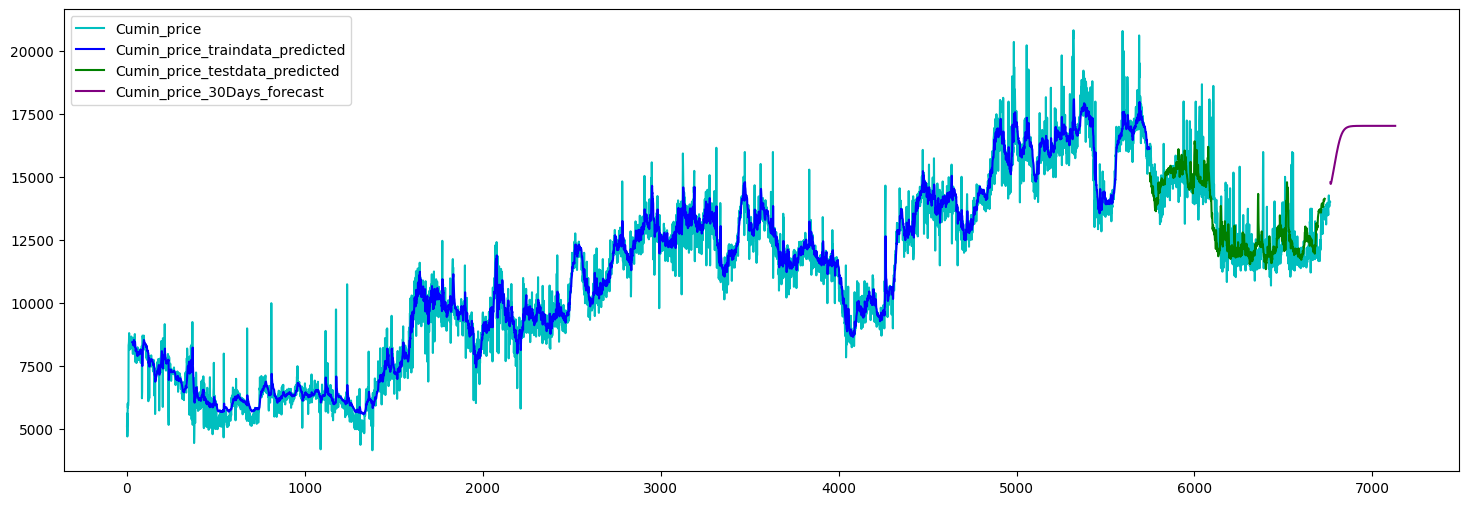

In [42]:
plt.figure(figsize=(18, 6))
plt.plot(day_raw,scaler.inverse_transform(df1[:-1]), color = 'c', label = 'Cumin_price')
plt.plot(day_train,train_predict, color = 'blue', label = 'Cumin_price_traindata_predicted')
plt.plot(day_test,test_predict, color = 'green', label = 'Cumin_price_testdata_predicted')
plt.plot(day_pred,scaler.inverse_transform(lstm_output), color = 'purple', label = 'Cumin_price_30Days_forecast')
plt.legend()
plt.show()

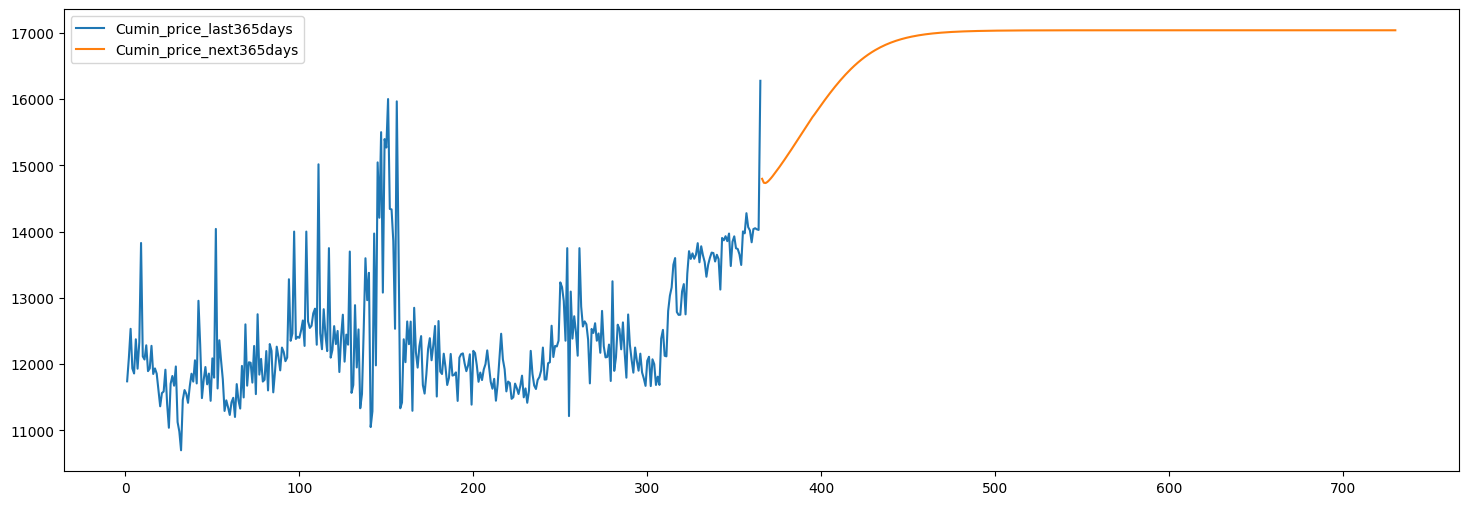

In [43]:
#plotting the graph showing forecast
plt.figure(figsize=(18, 6))
plt.plot(day_new1,scaler.inverse_transform(df1[6398:]), label = 'Cumin_price_last365days')
plt.plot(day_pred1,lstm_output1, label = 'Cumin_price_next365days')
plt.legend()
plt.show()